# Задача 1. Вводное задание.

Вектора $x_1$ и $y_1$ из [архива](https://toomanydigits.online/_downloads/a75b629c43e96b0eecf6256fef443125/data_interp.npz) дают значения некоторой функции $f(x)$.  
Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d) Аппроксимацию полиномами, используя функции np.polyfit и np.polyval.

Чтобы прочитать из архива данные, используйте следующий код:

In [1]:
import numpy as np
with np.load('data_interp.npz') as data:
  x1, y1 = data['x1'], data['y1']

In [11]:
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, PchipInterpolator

C:\Users\sasha\AppData\Local\Temp\ipykernel_17824\2350623141.py:21: RankWarning: Polyfit may be poorly conditioned
  polyfit_poly = np.poly1d(np.polyfit(x1, y1, x1.shape[0]))


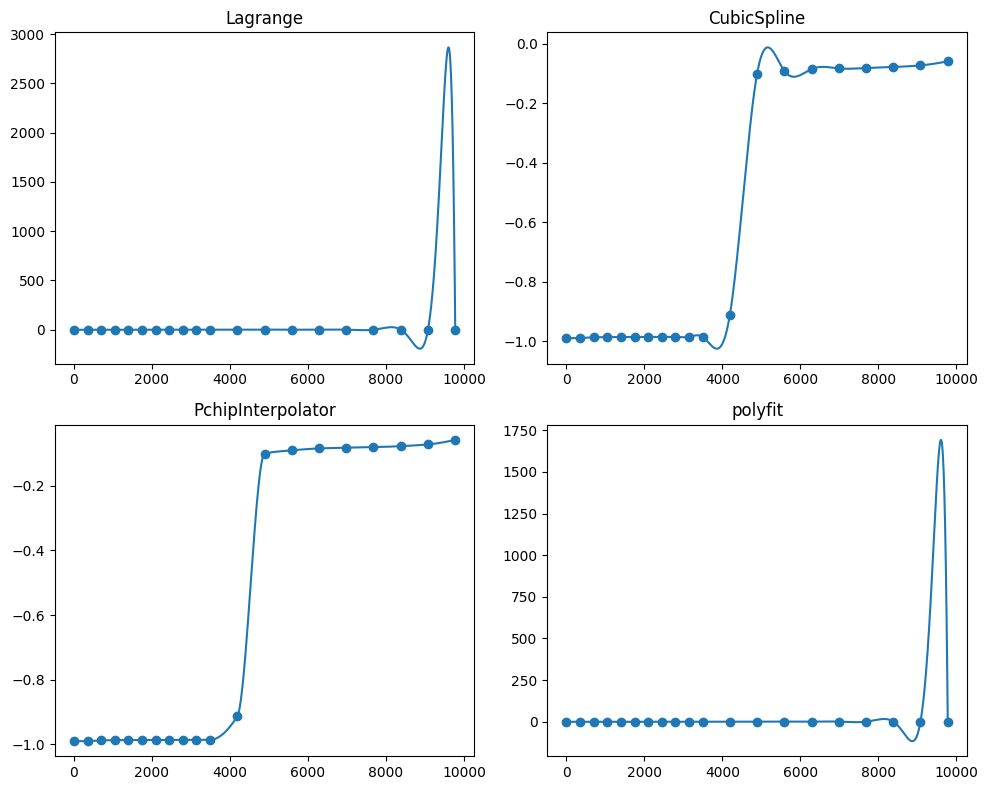

In [9]:
fig, axs = plt.subplots(2,2, figsize=(10, 8))

axs[0,0].scatter(x1, y1)
axs[0,1].scatter(x1, y1)
axs[1,0].scatter(x1, y1)
axs[1,1].scatter(x1, y1)
X = np.linspace(np.min(x1), np.max(x1), 1000)

Lagrange_poly = lagrange(x1,y1)
axs[0,0].plot(X, Lagrange_poly(X))
axs[0,0].title.set_text("Lagrange")

CubicSpline_poly = CubicSpline(x1,y1)
axs[0,1].plot(X, CubicSpline_poly(X))
axs[0,1].title.set_text("CubicSpline")

PchipInterpolator_poly = PchipInterpolator(x1,y1)
axs[1,0].plot(X, PchipInterpolator_poly(X))
axs[1,0].title.set_text("PchipInterpolator")

polyfit_poly = np.poly1d(np.polyfit(x1, y1, x1.shape[0]))
axs[1,1].plot(X, polyfit_poly(X))
axs[1,1].title.set_text("polyfit")

fig.tight_layout()

# Задача 2. Интерполяция полиномом Лагранжа.
Допишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как $xk$ и $yk$.  
Все в форме Ньютона

In [ ]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        n = self.yk.shape[0]
        coef = [yk.copy()] 
        for k in range(1, n+1):
            new_row = []
            for j in range(n - k):
                f_kj = (coef[k - 1][j + 1] - coef[k - 1][j]) / (self.xk[k + j] - xk[j])
                new_row.append(f_kj)
            coef.append(new_row)
        self.coef = np.asarray([coef[i][0] for i in range(n)], dtype=float)
        # есть таблица, суммируем по ней
    
    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        n = self.yk.shape[0]
        result = self.coef[0] 
        term = 1  
        for i in range(1, n):
            term *= (x - self.xk[i - 1])  
            result += self.coef[i] * term  
        # по формуле из задания
        return result
        raise NotImplementedError()

In [61]:
import matplotlib.pyplot as plt

[ 0.0000e+00 -1.0001e+00  9.9370e-01 -3.0100e-02 -3.5000e-02 -1.4000e-02
 -2.1000e-03 -1.0000e-04]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.55271368e-15 -1.33226763e-15  7.10542736e-15]


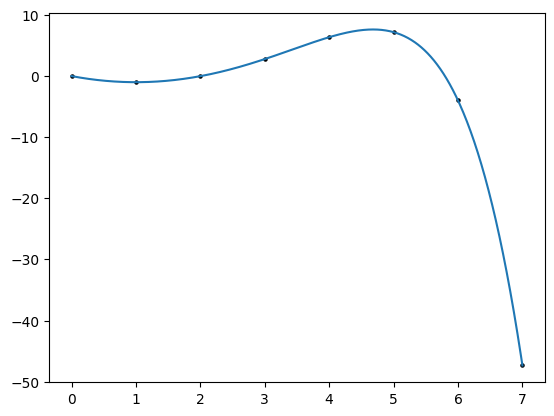

In [77]:
xk = np.array([0,1,2,3,4,5,6,7])
yk = - 10 ** (-4) * xk ** 7 + xk ** 2 - 2 * xk 

plt.scatter(xk, yk, s=5, c='black')
X = np.linspace(np.min(xk), np.max(xk), 1000)

lagrange_interpolator = LagrangeInterpolator(xk,yk)

plt.plot(X, lagrange_interpolator(X))
print(lagrange_interpolator.coef)
print(yk - lagrange_interpolator(xk))

# Задача 3. Феномен Рунге

Рассмотрим функцию Рунге $y = 1 / (1 + 25 x^2)$. Интерполируйте эту функцию на интервале $x \in [-2, 2]$, используя полином Лагранжа с $m = 3, 5, 7, 9, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике.

Допишите функцию, которая возвращает узлы Чебышева.

In [112]:
def cheb_nodes(n, a=-1, b=1):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$
    """
    result = []
    for k in range(n):
        x = (a+b)/2 + (b/2 - a/2) * np.cos(np.pi * (2*k + 1) / (2*n))
        result.append(x)
    return np.sort(np.array(result))
    raise NotImplementedError()

In [113]:
from numpy.testing import assert_allclose
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5)

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты. Также постройте интерполяцию кубическим сплайном тех же данных (scipy.interpolate.CubicSpline). Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?

In [163]:
def runge(x: np.array):
    return 1 / (1 + 25 * x**2)

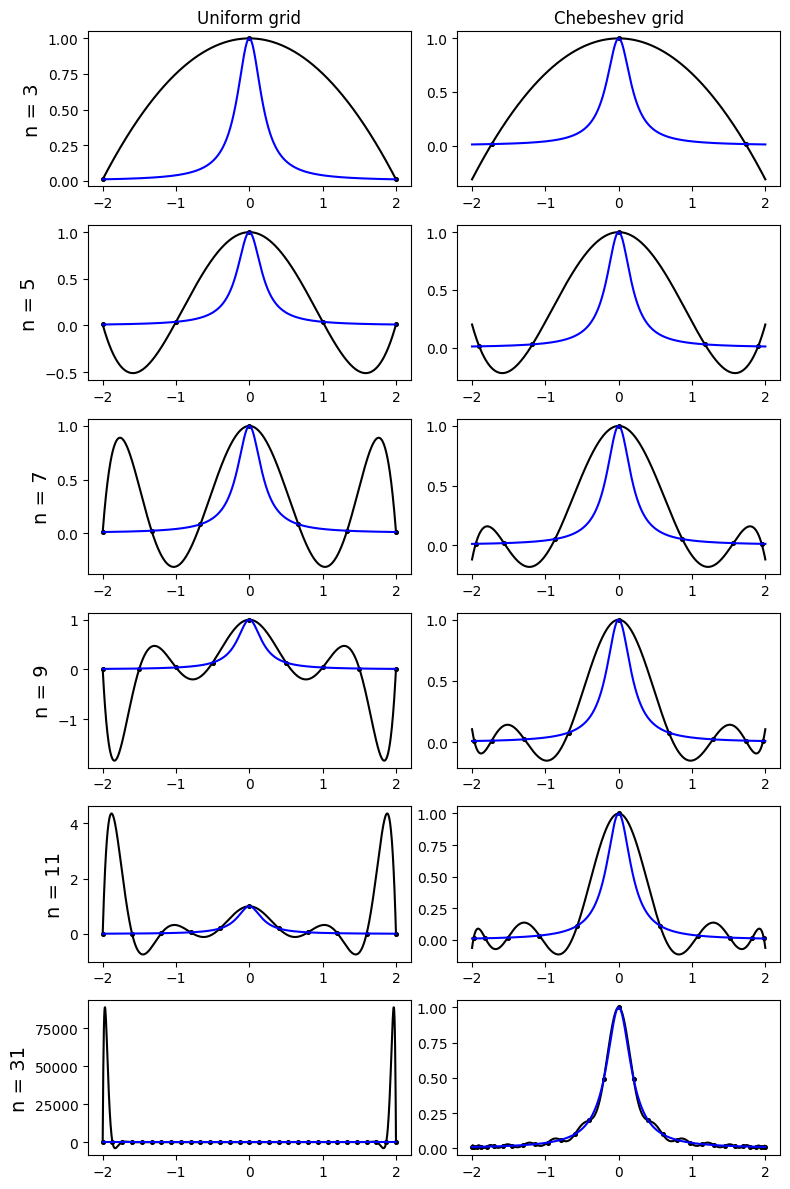

In [164]:
fig, axs = plt.subplots(6,2, figsize=(8, 12))

x1 = np.linspace(-2, 2, 3)
x2 = np.linspace(-2, 2, 5)
x3 = np.linspace(-2, 2, 7)
x4 = np.linspace(-2, 2, 9)
x5 = np.linspace(-2, 2, 11)
x6 = np.linspace(-2, 2, 31)
y1 = runge(x1)
y2 = runge(x2)
y3 = runge(x3)
y4 = runge(x4)
y5 = runge(x5)
y6 = runge(x6)

axs[0,0].scatter(x1, y1, c='black', s=7)
axs[1,0].scatter(x2, y2, c='black', s=7)
axs[2,0].scatter(x3, y3, c='black', s=7)
axs[3,0].scatter(x4, y4, c='black', s=7)
axs[4,0].scatter(x5, y5, c='black', s=7)
axs[5,0].scatter(x6, y6, c='black', s=7)

X = np.linspace(-2, 2, 1000)

Lagrange_poly = lagrange(x1,y1)
axs[0,0].plot(X, Lagrange_poly(X), c='black')
axs[0,0].plot(X, runge(X), c='blue')
axs[0,0].set_ylabel('n = 3', fontsize=14)

Lagrange_poly = lagrange(x2,y2)
axs[1,0].plot(X, Lagrange_poly(X), c='black')
axs[1,0].plot(X, runge(X), c='blue')
axs[1,0].set_ylabel('n = 5', fontsize=14)

Lagrange_poly = lagrange(x3,y3)
axs[2,0].plot(X, Lagrange_poly(X), c='black')
axs[2,0].plot(X, runge(X), c='blue')
axs[2,0].set_ylabel('n = 7', fontsize=14)

Lagrange_poly = lagrange(x4,y4)
axs[3,0].plot(X, Lagrange_poly(X), c='black')
axs[3,0].plot(X, runge(X), c='blue')
axs[3,0].set_ylabel('n = 9', fontsize=14)

Lagrange_poly = lagrange(x5,y5)
axs[4,0].plot(X, Lagrange_poly(X), c='black')
axs[4,0].plot(X, runge(X), c='blue')
axs[4,0].set_ylabel('n = 11', fontsize=14)

Lagrange_poly = lagrange(x6,y6)
axs[5,0].plot(X, Lagrange_poly(X), c='black')
axs[5,0].plot(X, runge(X), c='blue')
axs[5,0].set_ylabel('n = 31', fontsize=14)



cheb_x1 = cheb_nodes(3, a = -2, b = 2)
cheb_x2 = cheb_nodes(5, a = -2, b = 2)
cheb_x3 = cheb_nodes(7, a = -2, b = 2)
cheb_x4 = cheb_nodes(9, a = -2, b = 2)
cheb_x5 = cheb_nodes(11, a = -2, b = 2)
cheb_x6 = cheb_nodes(31, a = -2, b = 2)
cheb_y1 = runge(cheb_x1)
cheb_y2 = runge(cheb_x2)
cheb_y3 = runge(cheb_x3)
cheb_y4 = runge(cheb_x4)
cheb_y5 = runge(cheb_x5)
cheb_y6 = runge(cheb_x6)

axs[0,1].scatter(cheb_x1, cheb_y1, c='black', s=7)
axs[1,1].scatter(cheb_x2, cheb_y2, c='black', s=7)
axs[2,1].scatter(cheb_x3, cheb_y3, c='black', s=7)
axs[3,1].scatter(cheb_x4, cheb_y4, c='black', s=7)
axs[4,1].scatter(cheb_x5, cheb_y5, c='black', s=7)
axs[5,1].scatter(cheb_x6, cheb_y6, c='black', s=7)


Cheb_poly = lagrange(cheb_x1,cheb_y1)
axs[0,1].plot(X, Cheb_poly(X), c='black')
axs[0,1].plot(X, runge(X), c='blue')

Cheb_poly = lagrange(cheb_x2,cheb_y2)
axs[1,1].plot(X, Cheb_poly(X), c='black')
axs[1,1].plot(X, runge(X), c='blue')

Cheb_poly = lagrange(cheb_x3,cheb_y3)
axs[2,1].plot(X, Cheb_poly(X), c='black')
axs[2,1].plot(X, runge(X), c='blue')

Cheb_poly = lagrange(cheb_x4,cheb_y4)
axs[3,1].plot(X, Cheb_poly(X), c='black')
axs[3,1].plot(X, runge(X), c='blue')

Cheb_poly = lagrange(cheb_x5,cheb_y5)
axs[4,1].plot(X, Cheb_poly(X), c='black')
axs[4,1].plot(X, runge(X), c='blue')

Cheb_poly = lagrange(cheb_x6,cheb_y6)
axs[5,1].plot(X, Cheb_poly(X), c='black')
axs[5,1].plot(X, runge(X), c='blue')

axs[0,0].title.set_text("Uniform grid")
axs[0,1].title.set_text("Chebeshev grid")

fig.tight_layout()

Другим известным трудным тестом для интерполяции является следующая периодическая функция:
$$
    u(x) = \frac{\sqrt{\varepsilon (2 + \varepsilon)}}{2\pi (1 + \varepsilon - \cos x)}, -\pi < x < \pi, \varepsilon = 0.21.
$$

Проведите аналогичные вычисления и постройте графики для неё.

In [161]:
def u(x: np.array):
    e = 0.21
    return (e * (2 - e)) ** 0.5 / (2 * np.pi *(1 + e - np.cos(x)))

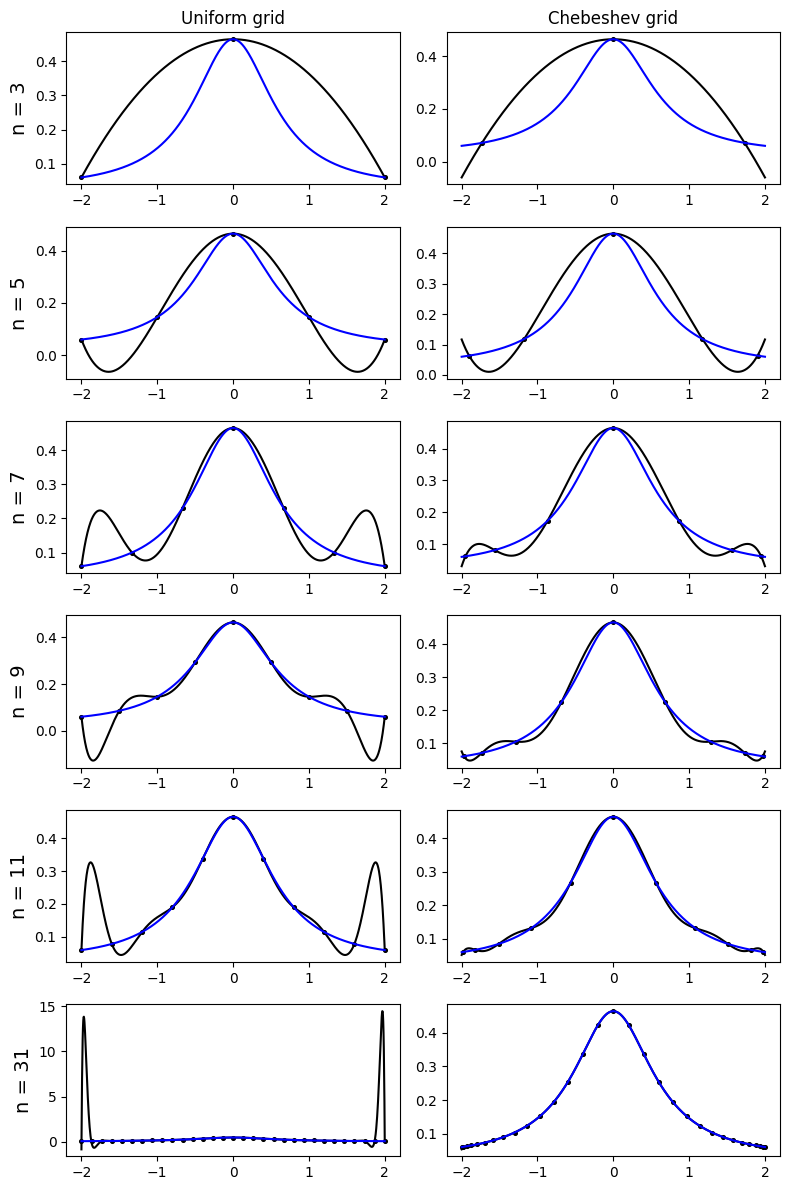

In [162]:
fig, axs = plt.subplots(6,2, figsize=(8, 12))

x1 = np.linspace(-2, 2, 3)
x2 = np.linspace(-2, 2, 5)
x3 = np.linspace(-2, 2, 7)
x4 = np.linspace(-2, 2, 9)
x5 = np.linspace(-2, 2, 11)
x6 = np.linspace(-2, 2, 31)
y1 = u(x1)
y2 = u(x2)
y3 = u(x3)
y4 = u(x4)
y5 = u(x5)
y6 = u(x6)

axs[0,0].scatter(x1, y1, c='black', s=7)
axs[1,0].scatter(x2, y2, c='black', s=7)
axs[2,0].scatter(x3, y3, c='black', s=7)
axs[3,0].scatter(x4, y4, c='black', s=7)
axs[4,0].scatter(x5, y5, c='black', s=7)
axs[5,0].scatter(x6, y6, c='black', s=7)

X = np.linspace(-2, 2, 1000)

Lagrange_poly = lagrange(x1,y1)
axs[0,0].plot(X, Lagrange_poly(X), c='black')
axs[0,0].plot(X, u(X), c='blue')
axs[0,0].set_ylabel('n = 3', fontsize=14)

Lagrange_poly = lagrange(x2,y2)
axs[1,0].plot(X, Lagrange_poly(X), c='black')
axs[1,0].plot(X, u(X), c='blue')
axs[1,0].set_ylabel('n = 5', fontsize=14)

Lagrange_poly = lagrange(x3,y3)
axs[2,0].plot(X, Lagrange_poly(X), c='black')
axs[2,0].plot(X, u(X), c='blue')
axs[2,0].set_ylabel('n = 7', fontsize=14)

Lagrange_poly = lagrange(x4,y4)
axs[3,0].plot(X, Lagrange_poly(X), c='black')
axs[3,0].plot(X, u(X), c='blue')
axs[3,0].set_ylabel('n = 9', fontsize=14)

Lagrange_poly = lagrange(x5,y5)
axs[4,0].plot(X, Lagrange_poly(X), c='black')
axs[4,0].plot(X, u(X), c='blue')
axs[4,0].set_ylabel('n = 11', fontsize=14)

Lagrange_poly = lagrange(x6,y6)
axs[5,0].plot(X, Lagrange_poly(X), c='black')
axs[5,0].plot(X, u(X), c='blue')
axs[5,0].set_ylabel('n = 31', fontsize=14)



cheb_x1 = cheb_nodes(3, a = -2, b = 2)
cheb_x2 = cheb_nodes(5, a = -2, b = 2)
cheb_x3 = cheb_nodes(7, a = -2, b = 2)
cheb_x4 = cheb_nodes(9, a = -2, b = 2)
cheb_x5 = cheb_nodes(11, a = -2, b = 2)
cheb_x6 = cheb_nodes(31, a = -2, b = 2)
cheb_y1 = u(cheb_x1)
cheb_y2 = u(cheb_x2)
cheb_y3 = u(cheb_x3)
cheb_y4 = u(cheb_x4)
cheb_y5 = u(cheb_x5)
cheb_y6 = u(cheb_x6)

axs[0,1].scatter(cheb_x1, cheb_y1, c='black', s=7)
axs[1,1].scatter(cheb_x2, cheb_y2, c='black', s=7)
axs[2,1].scatter(cheb_x3, cheb_y3, c='black', s=7)
axs[3,1].scatter(cheb_x4, cheb_y4, c='black', s=7)
axs[4,1].scatter(cheb_x5, cheb_y5, c='black', s=7)
axs[5,1].scatter(cheb_x6, cheb_y6, c='black', s=7)


Cheb_poly = lagrange(cheb_x1,cheb_y1)
axs[0,1].plot(X, Cheb_poly(X), c='black')
axs[0,1].plot(X, u(X), c='blue')

Cheb_poly = lagrange(cheb_x2,cheb_y2)
axs[1,1].plot(X, Cheb_poly(X), c='black')
axs[1,1].plot(X, u(X), c='blue')

Cheb_poly = lagrange(cheb_x3,cheb_y3)
axs[2,1].plot(X, Cheb_poly(X), c='black')
axs[2,1].plot(X, u(X), c='blue')

Cheb_poly = lagrange(cheb_x4,cheb_y4)
axs[3,1].plot(X, Cheb_poly(X), c='black')
axs[3,1].plot(X, u(X), c='blue')

Cheb_poly = lagrange(cheb_x5,cheb_y5)
axs[4,1].plot(X, Cheb_poly(X), c='black')
axs[4,1].plot(X, u(X), c='blue')

Cheb_poly = lagrange(cheb_x6,cheb_y6)
axs[5,1].plot(X, Cheb_poly(X), c='black')
axs[5,1].plot(X, u(X), c='blue')

axs[0,0].title.set_text("Uniform grid")
axs[0,1].title.set_text("Chebeshev grid")

fig.tight_layout()

# Задача 4. UnivariateSpline.

Прочитать документацию к [UnivariateSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html) и определить оптимальное значение для параметра сглаживания **s**, учитывая, что шум был задан в виде $u_i = ... + 0.5 \xi_i, \ \xi_i \sim \mathcal{N}(0,1)$.  
Экспериментально проверить оптимальность этого значения для какой-либо функции.

**s: float or None, optional**  
Positive smoothing factor used to choose the number of knots. Number of knots will be increased until the smoothing condition is satisfied:
$$
sum((w[i] * (y[i]-spl(x[i])))**2, axis=0) <= s
$$

Чем меньше s, тем больше он будет создавать узлом для сплайна. 
Ошибка данных

In [31]:
def u(x):
    return -0.1 * x**7 + x**2

In [34]:
x = np.linspace(-2,2, 10)
y = u(x) + 0.5 * np.random.normal(loc=0, scale=1, size=x.shape[0])

In [29]:
from scipy.interpolate import UnivariateSpline

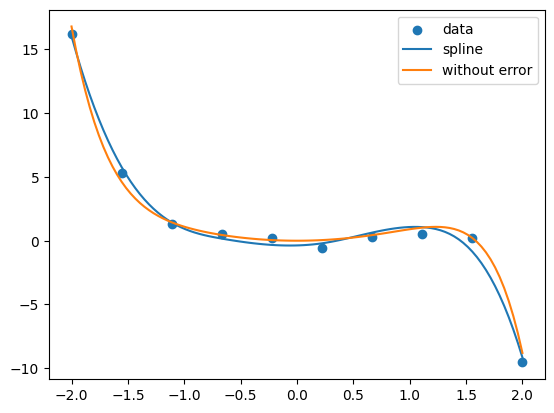

In [54]:
spl = UnivariateSpline(x, y, s=0.25 * 10)
plt.scatter(x, y, label="data")
X = np.linspace(-2,2,100)
plt.plot(X, spl(X), label="spline")
plt.plot(X, u(X), label="without error")
plt.legend()

# Задача 5. Производная и шум

Цель - найти производную следующей таблично-заданной функции с шумом. Всего есть 1000 узлов. Генерировать новые точки нельзя.
$$
    u(t) = \frac{200}{1 + \frac{t}{200}} (0.5 + 0.5 \cos (0.04 t)) + \text{noise}
$$

1. Сделайте это через конечные разности, используя минимальное даное расстояние между точками. Вспоминаем семинар 1.
2. Сделайте это через оптимальный шаг численного дифференциирования. То есть, при оценке производной надо брать несоседние точки исходя из погрешностей $u_i$. Какой шаг надо брать по индексам точек?
3. Сделайте это через UnivariateSpline, используя метод .derivative() - он аналитически дифференциирует объект сплайна и выдаёт также объект сплайна (т.е. можем обращаться к нему как к функции). Не забывайте корректно определить параметр s.

Сравните все 3 способа численного взятия производной с аналитической производной как графически, так и используя какой-нибудь Loss.


In [56]:
import numpy as np

t = np.linspace(0, 1000, 1000)
u = 200 / (1 + t/200) * (0.5 + 0.5 * np.cos(0.04 * t)) + 0.5 * np.random.randn(len(t))
der_u = - (0.5 + 0.5 * np.cos(0.04 * t)) / (1 + t/200)**2 - 4 * np.sin(0.04 * t) / (1 + t/200)

# 1

In [22]:
def simple_deriv(x, t, u):
    i = np.where(t - x > 0)[0][0]
    return (-u[i-3]/60 + 3*u[i-2]/20 - 3*u[i-1]/4 + 3*u[i+1]/4 - 3*u[i+2]/20 + u[i+3]/60) / (t[i] - t[i-1])

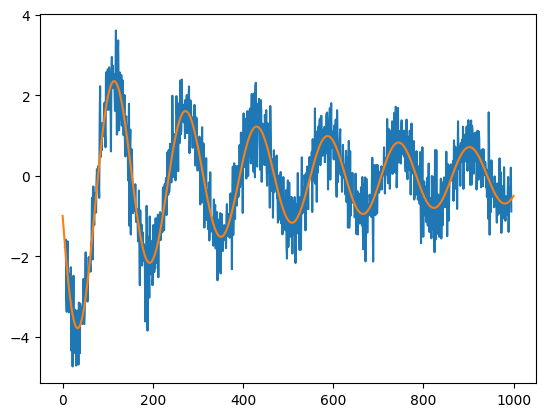

In [24]:
plt.plot(t[5:-5], np.array([simple_deriv(x, t, u) for x in t[5:-5]]))
plt.plot(t,der_u)

# 2 Зачем это делать, если тогда известны точки без ошибки

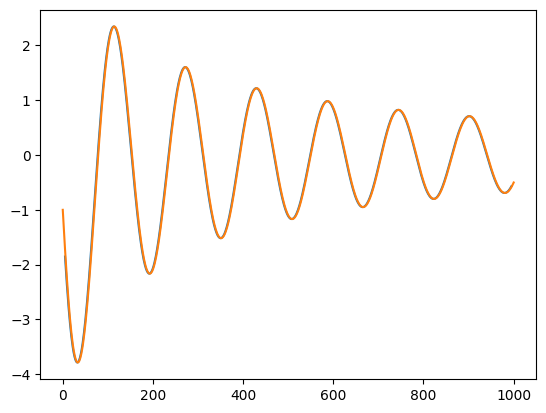

In [27]:
u_noerr = 200 / (1 + t/200) * (0.5 + 0.5 * np.cos(0.04 * t))
plt.plot(t[5:-5], np.array([simple_deriv(x, t, u_noerr) for x in t[5:-5]]))
plt.plot(t,der_u)

# 3

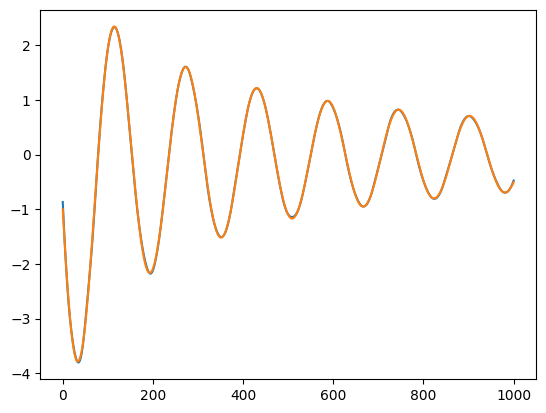

In [64]:
spl = UnivariateSpline(t, u, s=0.25 * 1000)

spl_der = spl.derivative()
plt.plot(t,spl_der(t))
plt.plot(t,der_u)


# Задача 6*. Аппроксимация узлов Чебышева.

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке $[-1,1]$.



In [1]:
import numpy as np
with np.load('data_interp.npz') as data:
  x1, y1 = data['x5'], data['y5']

In [2]:
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

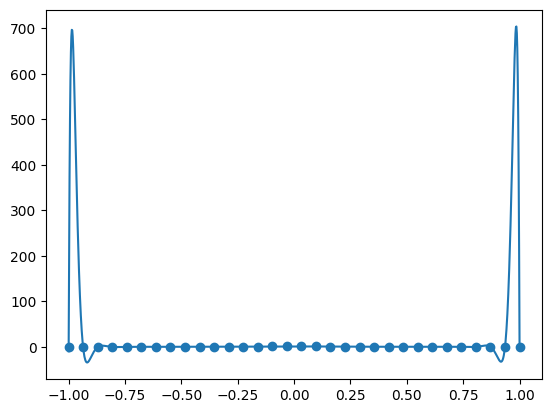

In [3]:
plt.scatter(x1, y1)
X = np.linspace(np.min(x1), np.max(x1), 1000)

Lagrange_poly = lagrange(x1,y1)
plt.plot(X, Lagrange_poly(X))

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной по формуле $x = x(s)$, где
$$
    x = x(s) = \frac{1}{53089} (40320 s + 6720 s^3 + 3024 s^5 + 1800 s^7 + 1225 s^9)
$$
функция, приближённо отображающая чебышевскую сетку в равномерную. Да, вам надо численно реализовать обратное отображение. В новой переменной $s$, составьте интерполяционный многочлен $P(s)$ Постройте график получившейся интерполяции исходной функции $P(s(x))$. Делает ли такая процедура явление Рунге менее выраженным?

Надо решить $x(s) = x$, т.е. $s = \Phi(s) = s - \lambda (x(s) - x)$. Пар-тр $\lambda$ подбираем так, чтобы можно было использовать МПП, т.е. $max|\Phi'| = \lambda x'(s) < 1$. Получаем $\lambda = 0.1$ хватит.

In [4]:
def x_func(s):
    return 1/53089 *(40320*s + 6720*s**3 + 3024*s**5 + 1800*s**7 + 1225*s**9)

def Phi(s:float, x:float):
    return s - 0.1 * (x_func(s) - x)

def find_root(x:float):
    result = x
    for i in range(1000):
        result = Phi(result, x)
    return result

In [5]:
vectorized_find_root = np.vectorize(find_root)
s1 = vectorized_find_root(x1)

Text(0, 0.5, 'y')

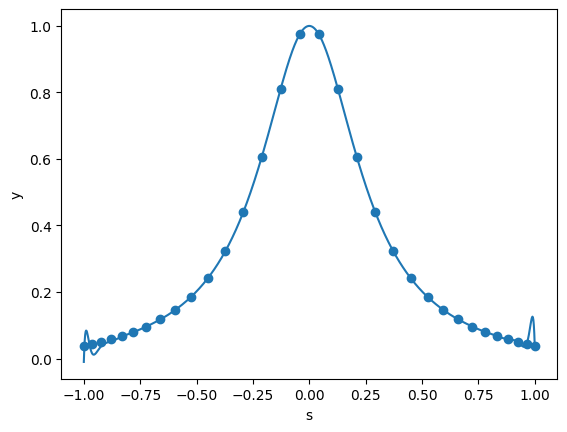

In [7]:
plt.scatter(s1, y1)
X = np.linspace(-1, 1, 1000)

Lagrange_poly = lagrange(s1,y1)
plt.plot(X, Lagrange_poly(X))
plt.xlabel("s")
plt.ylabel("y")

Text(0, 0.5, 'y')

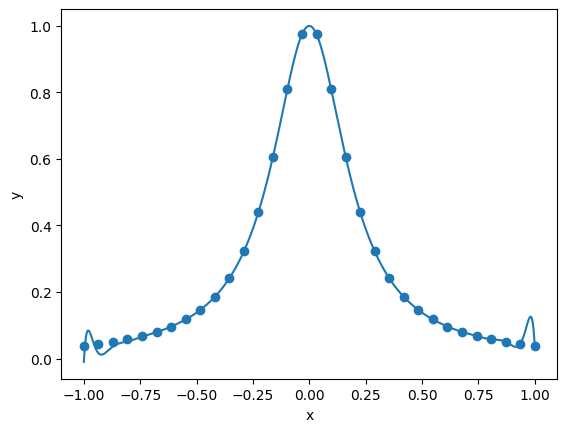

In [8]:
plt.scatter(x1, y1)
X = np.linspace(-1, 1, 1000)

plt.plot(X, Lagrange_poly(vectorized_find_root(X)))
plt.xlabel("x")
plt.ylabel("y")